### AI-05 Practice 1  

#### Import libraries  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#### Parameters  

In [11]:
csv_in = 'cls-data1.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [12]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(200, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      200 non-null    float64
 1   d2      200 non-null    float64
 2   type    200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB
None


,d1,d2,type
0,5.52,7.22,v1
1,3.58,8.34,v1
2,4.03,8.35,v1
3,4.37,6.70,v1
4,3.29,8.44,v1


#### Separate data  

In [13]:
df_data = df[['d1', 'd2']]
print(df_data.shape)
display(df_data.head())
ids = df_data.index

(200, 2)


,d1,d2
0,5.52,7.22
1,3.58,8.34
2,4.03,8.35
3,4.37,6.70
4,3.29,8.44


#### Execute clustering  

In [14]:
Z = linkage(df_data, method='ward', metric='euclidean')
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2',
                             'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) 
                           for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z.head())
display(df_Z.tail())

,label1,label2,distance,#members
merged200,128,191,0.010000,2
merged201,26,64,0.014142,2
merged202,109,185,0.014142,2
merged203,27,152,0.022361,2
merged204,105,189,0.028284,2


,label1,label2,distance,#members
merged394,387,392,6.372544,41
merged395,386,390,6.680696,85
merged396,388,395,9.401509,111
merged397,393,394,9.647273,89
merged398,396,397,21.918007,200


#### Draw dendgrogram  
**Ans.1**

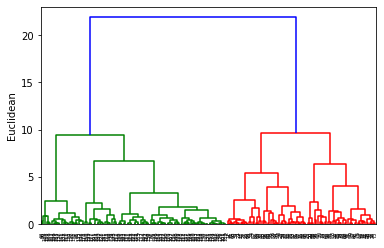

In [15]:
dendr = dendrogram(Z, labels=ids)
plt.xticks(rotation=90)
plt.ylabel('Euclidean')
plt.show()

#### Get results of clustering  

In [16]:
dist = df_Z['distance']
n_cluster = 2
print('=== n_cluster:', n_cluster, '===')
cls = pd.Series(fcluster(Z, n_cluster, criterion='maxclust'), index=ids)
print('dist:', dist[n_data-n_cluster])
print(cls.head())

=== n_cluster: 2 ===
dist: 9.647273232019318
0    2
1    2
2    2
3    2
4    2
dtype: int32


#### Make cross table  
**Ans. 2**  

In [17]:
ct = pd.crosstab(df['type'], cls)
display(ct)

col_0,1,2
type,,
v1,11,89
v2,100,0


**The number of v1 in cluster 2: 89**  

**About 90% of v1 is included in cluster 2.
All of v2 is included in cluster 1.
We can see high correspondence between the type of virus and the cluster number, so values of "d1" and "d2" used for clustering is highly related to the type of virus.**

**v1の約90%がクラスタ2に含まれる。
v2はすべてクラスタ1に含まれる。
ウイルスの種類とクラスタ番号はよく対応しており、
クラスタリングに用いた指標d1, d2 は「ウイルスの種類」に強く関連しているといえる。**

#### Draw the scatter plot  
**Ans. 4**  

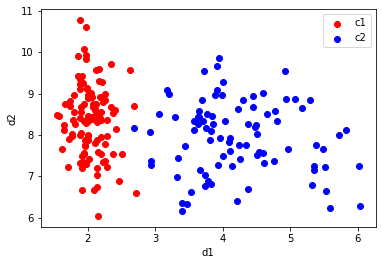

In [18]:
df_c1 = df[ cls==1 ]
df_c2 = df[ cls==2 ]

plt.scatter(df_c1['d1'], df_c1['d2'], color='red', label='c1')
plt.scatter(df_c2['d1'], df_c2['d2'], color='blue', label='c2')
plt.xlabel('d1')
plt.ylabel('d2')
plt.legend()
plt.show()

##### Alternative solution (別解)  

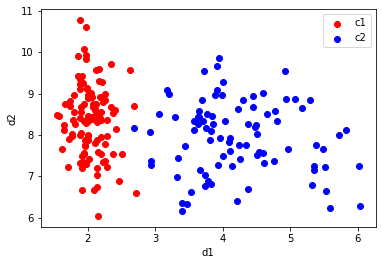

In [19]:
n_cluster = 2
colors = ['red', 'blue']

for i in range(n_cluster):
    df_c = df[ cls==i+1 ]
    c = colors[i]
    label = 'c{}'.format(i+1)
    plt.scatter(df_c['d1'], df_c['d2'], color=c, label=label)

plt.xlabel('d1')
plt.ylabel('d2')
plt.legend()
plt.show()